## Regression Linéaire

### Régression Linéaire simple

In [3]:
## Import des bibliothèques
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

Préparation des données pour le 1er Excercice

In [15]:
# Data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

x_tensor = torch.from_numpy(X_numpy.astype(np.float32))
y_tensor = torch.from_numpy(y_numpy.astype(np.float32))
y_tensor = y_tensor.view(y_tensor.shape[0], 1)

n_samples, n_features = x_tensor.shape

Excercice : Générer un model de régression linéaire à l'aide de pytorch puis afficher la regression, avec ces points.

In [14]:
## A Réaliser

Solution de l'excercice :

The loss is 5764.2217 for the epoch of 0
The loss is 508.5431 for the epoch of 10
The loss is 338.5859 for the epoch of 20
The loss is 332.7771 for the epoch of 30
The loss is 332.5749 for the epoch of 40
The loss is 332.5678 for the epoch of 50
The loss is 332.5676 for the epoch of 60


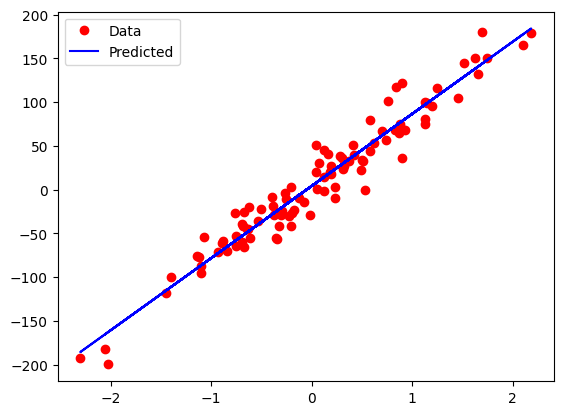

In [30]:
# 1) Model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) Fonction Loss et Optimizer
learning_rate = 0.1
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Boucle d'entrainement
n_iters = 60
for each_epoch in range(n_iters+1):
    # 4) Calcul de la projection
    y_prediction = model(x_tensor)
    loss = criterion(y_prediction, y_tensor)

    # 5) Calcul du gradient
    loss.backward()

    # 6) Update les parametres
    optimizer.step()

    # 7) Rénitialise le gradient
    optimizer.zero_grad()

    if each_epoch % 10 == 0:
        print(f"The loss is {loss.item():.4f} for the epoch of {each_epoch}")

prediction = model(x_tensor).detach()
plt.plot(X_numpy, y_numpy, 'ro', label='Data')
plt.plot(X_numpy, prediction, 'b', label='Predicted')
plt.legend()
plt.show()

### Régression Logistique

In [2]:
## Import des bibliothèques
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Préparation des données pour le 2er Excercice

In [7]:
# Data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

Excercice : Calibrer le model à l'aide de sklearn à une couche avec une fonction logistique en tant que dernier couche. L'exercice consiste a créer un clasifieur qui permet de classifier si l'individu à un cancer.

Conseil : 
- La mesure choisis peut être : BCELoss (Binary Cross Entrepoie), car les outputs sont comprises entre 0 et 1.
- Une classe peut-être utilisé ou une méthode bien choisit présent dans la bilbiothèque.

In [31]:
# Excercie à réaliser

Solution de l'exercice

In [14]:
class LineaireLogisitic(nn.Module):

    def __init__(self, input_dim, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        # Layer
        self.lay1 = nn.Linear(input_dim, 1)
    
    def forward(self, value):
        return torch.sigmoid(self.lay1(value))
    
learning_rate = 0.1
model = LineaireLogisitic(input_dim=n_features)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.BCELoss()

n_iters = 50
for epoch in range(n_iters+1):
    # Evaluation
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)

    loss.backward()

    optimizer.step()

    optimizer.zero_grad()

    if epoch % 10 == 0:
        print(f"The loss is {loss.item():.4f} for the epoch of {epoch}")

with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    accuracy = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f"The accuracy is egual to {accuracy}")



The loss is 0.5951 for the epoch of 0
The loss is 0.2318 for the epoch of 10
The loss is 0.1718 for the epoch of 20
The loss is 0.1436 for the epoch of 30
The loss is 0.1267 for the epoch of 40
The loss is 0.1152 for the epoch of 50
The accuracy is egual to 0.9122806787490845


In [15]:
y_test

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
      